# How much are we still undercounting COVID-19 cases? 
## Comparing seroprevalence testing to case diagnoses

### Summary

This study seeks to update some of the previous research that had been done to measure how many actual COVID-19 infections there are for every positive case diagnosis in the United States. Previous research utilizing data from the early phase of the outbreak reported an undercount rate as high as ten infections for every one positive diagnosis. Since those early studies were published, the diagnostic testing shortage has been fixed. This study calculates a new undercount rate based upon data captured after current testing capabilities were solidly in place.

This study finds the undercount rate has declined substantially, as would be expected. Currently, there appears to be less than two actual infections for every one positive case diagnosis. Also, the undercount rate appears to be smaller for older patients than it is for younger ones. 

# Add in quick bar chart comparison. Chart one undercount rate by age with C.I. for the initial time period. Chart two, the same for latter time period.

### Background

Numerous studies point to substantially more people being infected with COVID-19 than diagnosed with antigen testing. Two known, significant factors have contributed to the undercount rate since COVID-19 began. Antigen testing shortages were acute in the early phases of the outbreak. The shortages were addressed by early to mid summer 2020. The antigen test kit shortage was significant, but temporary. Another known factor contributing to undercounting is that antigen testing programs focus mostly on testing symptomatic patients and may miss those who are mildly symptomatic or asymptomatic. This factor is ongoing.

Knowing that antigen diagnostic testing programs undercount actual infections, the CDC has been partnering with blood-testing labs across the US to conduct a secondary analysis for COVID-19 antibodies in a selection of the blood samples that the labs receive in the course of their business. The presence of antibodies for the coronavirus is considered to be a good indicator of a previous COVID-19 infection in an individual. They are considered to be a better measure of COVID-19 prevalence in a population than the cumulative sum of positive diagnostic antigen tests.

The largest of the seroprevalence testing efforts is known as the [National Commercial Laboratory Seroprevalence Survey](https://covid.cdc.gov/covid-data-tracker/#national-lab). For this survey, the CDC gathers results from these blood tests in batches--which they refer to as rounds--and publishes the results to their website. They use the results from these samples to estimate the cumulative number of infections in a population (such as a state or a metropolitan area) and then compare those to the total number of cases reported for that same population. Each round will contain tens of thousands of samples from nearly every state. They have released data from a total of eight rounds, with the first round corresponding roughly to the first two weeks of August, 2020 and every two weeks thereafter through November. The latest release of data covering the final two weeks of November was released on January 11, 2021.

When data from the first rounds of this survey first became available, researchers used it to estimate the rate at which antigen diagnosed cases undercounts actual infections ([Anand](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)32009-2/fulltext)). They calculated that there were in the neighborhood of ten actual infections for every one diagnosed case. Other researchers estimated similar undercount rates from other seroprevalence studies published at that time ([Shuchi](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)32009-2/fulltext), [Hicks](https://academic.oup.com/jid/advance-article/doi/10.1093/infdis/jiaa623/5917625)). Such large rates of undercounting from that time aren't surprising given that he seroprevalence blood tests at that time were performed on data collected in the spring and summer of 2020 when the COVID-19 outbreak was in its early stages and antigen testing shortages were most severe. 

Diagnostic antigen testing availability has improved markedly since then. Has the undercount rate changed? The CDC has released more data--data that may be able to shed light on this question. The CDC publishes some state-level statistics on their website, but they do not provide a comprehensive answer to the question of how the undercount rate has changed. This study uses the most recent data from the CDC to provide an up-to-date measure of the current undercount rate nationwide.

**** Keep or drop?
A good infection undercount estimate has a number of uses. Researchers can use it to reweight cases in a population to come up with an estimate of infections in a given population. These estimates could prove useful to  researchers who are looking at how the reproduction rate for COVID-19 changes as the percentage of the population that is infected changes. It may also be useful for planning vaccination strategies. ****

### Limitations

Statistics apply to the populations sampled, which has limitations when applied to the US population at large. For one, the sample is not geographically complete. Also, sample sizes were relatively consistent from state to state meaning that smaller states are over-represented in the aggregate sample. Final statistics were adjusted for state population size to address this limitation as much as possible. 

The data that the CDC has made available is summarized at the state level for each round and they only report the number of observed positives and the percentage of tests that were positive (to one decimal point), but not the overall number of tests. The number of overall tests was derived mathematically for this study, although the calculated numbers are inherently imprecise. 

Finally, the sample population for seroprevalence tests that the CDC could have some bias and not be representative of the overall population, and the case diagnosis and seroprevalence tests themselves are not 100% accurate. 

Nevertheless, we are looking for general statistics, and the data that is available should be adequate to she some light on the current undercount rate.

### Method

This study compares COVID-19 prevalence statistics in a population derived from two different testing regimes. The first testing regime identifies the presence of antibodies in the blood, which is a marker of a prior COVID-19 infection. This is known as a seroprevalence test and is considering the more definitive of the two tests. This project uses data from the CDC's [National Commercial Laboratory Seroprevalence Survey](https://covid.cdc.gov/covid-data-tracker/#national-lab). 

The second testing regime identifies the presence of antigens in people who are actively infected with COVID-19. Their cumulative total is an another measure of COVID-19 infection prevalence, albeit less accurate than the seroprevalence antibody tests. The advantahe to the antigen-detection case diagnosis data is that it is more of a real-time measure of the spread of COVID infection. This project uses case diagnosis data from the CDC ([COVID-19 Case Surveillance Public Use Data](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf)).

The comparison of these two datasets requires some data wrangling, or data munging, to make them comparable. For instance, time periods needed to be synchronized between the two datasets. Additionally, geographic (U.S. state) field values needed to be aligned to allow for the datasets to be combined in a meaningful way.



Perhaps the biggest challenge is that the CDC employed a stratified sampling method to allow for  sure every state and age subgroup had enough samples to 

### Results

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Comparing infection estimate from seroprevalence to actual case rate
- The CDC has been conducting seroprevalence surveys (prevalence of antibodies to COVID in blood samples) in people across the country. They provide estimates on their website of the total people who have been infected. These estimates are several times more than the number of diagnosed cases based on antigen testing (such as the common PCR nasal swab test). This is important since the diagnosed case numbers are reported everywhere even though they are significant understatements of the actual number of infections.
- Seroprevalence data source: https://data.cdc.gov/Laboratory-Surveillance/Nationwide-Commercial-Laboratory-Seroprevalence-Su/d2tw-32xv/data
- The code below explores the comparison between the infection estimates from seroprevalence tests and diagnoses cases from antigen tests. Is there a reasonable method for weighting diagnosed cases to come up with a reliable estimate of actual infections? Antigen testing capacity was scarce in the early months of the epidemic. Those states with early outbreaks have the highest disparity between estimated infections and diagnosed cases. Are there other obvious disparities? Can this information be used to create reliable estimates of infections?

In [2]:
seroprev = pd.read_csv('../data/Nationwide_Commercial_Laboratory_Seroprevalence_Survey_December.csv')[
    ['Site', 'Date Range of Specimen Collection', 'Round', 'Estimated cumulative infections count']]
seroprev.head(2)

,Site,Date Range of Specimen Collection,Round,Estimated cumulative infections count
0,AK,"Aug 6 - Aug 11, 2020",1,2216.0
1,AL,"Jul 29 - Aug 13, 2020",1,282151.0


### Data discussion
Some time was spent looking at this dataset to understand what it contained. We loaded just the columns that we needed. Those columns include the Site, aka state, 

We need to convert the date range for each round to a usable format. The specimen collection windows differ slightly by state. Let's find the latest closing date for a given round to use as our marker. 

In [3]:
seroprev['date_range_top'] = pd.to_datetime(seroprev['Date Range of Specimen Collection'].
                                str[-12:].str.strip())
round_dates = (seroprev.groupby('Round').agg(
                                date_range_top_max = ('date_range_top', 'max'))
                                )

seroprev = seroprev.merge(round_dates, how='left', on='Round').drop('date_range_top', axis=1)

In [4]:
seroprev.head(2)

,Site,Date Range of Specimen Collection,Round,Estimated cumulative infections count,date_range_top_max
0,AK,"Aug 6 - Aug 11, 2020",1,2216.0,2020-08-13
1,AL,"Jul 29 - Aug 13, 2020",1,282151.0,2020-08-13


The seroprevalence dataset provides an estimated infections count for each state based on seroprevalence statistics collected during that particular round. Let's compare that to the cumulative COVID cases. For this project we are going to use the COVID diagnosis data from the COVID Tracking project. We are going to load in just the columns we may need and then do some date formatting.

In [5]:
# Load in the COVID Tracking Project dataset by date and by state for US
df_cases = pd.read_csv("https://api.covidtracking.com/v1/states/daily.csv")[
                                ['date', 'state', 'fips','positiveIncrease']]

df_cases['date'] = pd.to_datetime(df_cases['date'], format='%Y%m%d')
df_cases['date']

df_cases = df_cases.sort_values('date', ascending=True)
df_cases.tail(3)

,date,state,fips,positiveIncrease
30,2021-02-18,NC,37,3916
28,2021-02-18,MS,28,134
0,2021-02-18,AK,2,210


We then sum up cumulative cases for each state coinciding with the dates that closed out each seroprevalence study  round. We can then create a new master dataset by merging the case data with the original seroprevalence dataset. 

In [6]:
temp_case_df = []
for round in range(len(round_dates)):
    round_df = (df_cases[df_cases['date'] <= round_dates.iloc[round][0]].
                   groupby('state').
                   agg(cumulative_cases = ('positiveIncrease','sum'))
                    ).reset_index()
    round_df['round'] = round + 1
    temp_case_df.append(round_df)

case_df = pd.concat(temp_case_df, ignore_index=True)

In [7]:
master_df = seroprev.merge(case_df, left_on=['Site', 'Round'], right_on=['state', 'round'])

In [8]:
master_df.groupby('round').sum()

,Round,Estimated cumulative infections count,cumulative_cases
round,,,
1,52,20024515.0,5205921
2,104,19876979.0,5817413
3,156,20962989.0,6342847
4,208,22558634.0,6914842
5,260,23240552.0,7535987
6,312,24166487.0,8334715
7,364,28265540.0,11052582
8,416,31579249.0,13382519
9,468,39123849.0,16066020


Now it's time for some statistics. The estimated cumulative infections were calculated based only upon data collected from that round for each particular state. Let's calculate an *undercount rate* from this data by dividing estimated cumulative infections by cumulative diagnosed cases. *What does this distribution of these independent samples look like?* If it is normally distributed then we might be able to assume that a single probability function underlies all of the data. That would be helpful if it were true. If so, we could apply the overall sample mean as a weight to case diagnoses to calculate estimated infections for each state. 
 

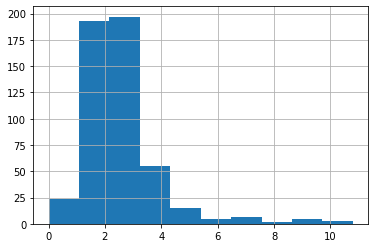

In [9]:
# This is somewhat promising because the distribution of the undercount_rate has a normal appearance with a tail. 
master_df['undercount_rate'] = master_df['Estimated cumulative infections count'] / master_df['cumulative_cases']
master_df['undercount_rate'].hist();

While the histogram is (somewhat) normally distributed, we need to dig a little further. Data was collected from 50 states over eight different rounds, or time periods. One test for randomness would be to see if a state's undercount rate was consistently over, or under, the overall undercount rate over the eight different rounds. Randomness would mean that the undercount rate for a given state and given round would have an equal probability of being over or under the overall mean. 

The chart below shows this isn't the case. Each line plots the undercount rate for one state over the eight rounds. (State names aren't displayed to minimize clutter.) States are color coded according to whether the average undercount rate for that state falls above (noted with a blue line) or below (gold line) the overall underount rate. There is a clear pattern. The undercount rates for some states consistently fall above the overall average undercount rate and others fall consistently fall below it. This suggests that each state may have its own undercount rate probability function. This implies that things that vary by state like population dynamics, test facility availability, etc. may play a role in determining a state's case diagnosis undercount rate. While it may not be perfect, a reasonable approach may be to use each state's unique average undercount rate to estimate infections from case diagnoses.

There's a second thing to note about the chart. The lines for the three states with the two highest undercount rates--they happen to be New York, Pennsylvania, and New Jersey--trend downwards from Round 1 to Round 8. What is going on here? This is pretty straightforward. All three states were hit early and hard with COVID at a time when COVID case testing capabilities were unprepared to meet demand. Many infections went undiagnosed in those early stages until testing capacity increased. As time progressed and a higher percentage of infections were diagnosed, the percentage of undiagnosed infections as a percentage of total infections decreased. This suggests that it may be reasonable to use a different undercount rate for the first several months of the outbreak. It may also be reasonable to assume that undercounting was most severe for those three states which were severely impacted early on.

In [10]:
rolling_mean = []
for round_ in master_df['Round'].sort_values().unique():
    rolling_mean.append(
        float(master_df[master_df['Round']==round_][['Estimated cumulative infections count']].sum()) /
        float(master_df[master_df['Round']==round_][['cumulative_cases']].sum()))

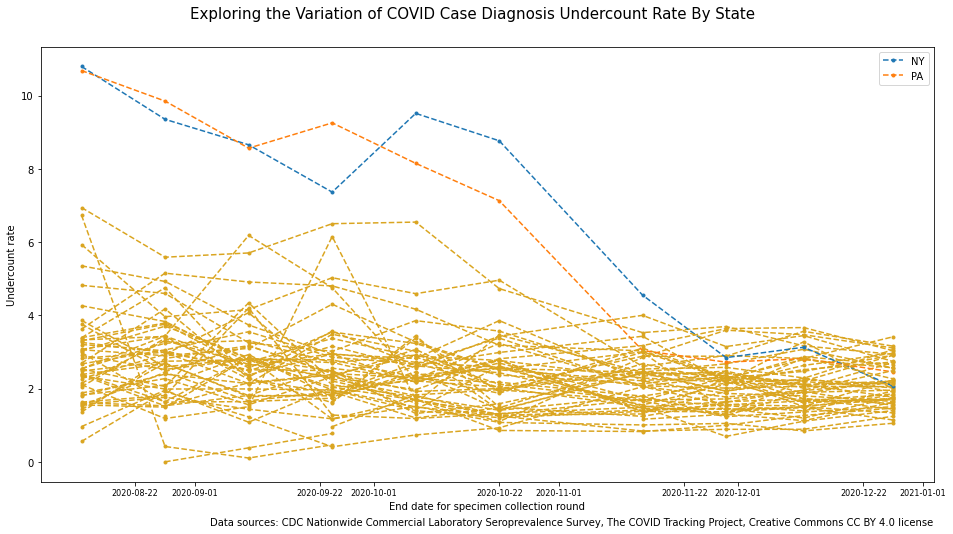

In [11]:
fig, ax = plt.subplots(figsize = (16, 8))
for state in master_df['state'].unique():
    if float(master_df[master_df['state']==state][['undercount_rate']].iloc[0]) > 10:
        ax.plot(
            master_df[master_df['state']==state][['date_range_top_max']], 
            master_df[master_df['state']==state][['undercount_rate']], 
            label = state,
            ls = '--',
            marker = '.')    
    else:
        ax.plot(
            master_df[master_df['state']==state][['date_range_top_max']], 
            master_df[master_df['state']==state][['undercount_rate']], 
            color = 'goldenrod',
            ls = '--',
            marker = '.')    
ax.tick_params(axis='x', which='major', labelsize=8)
ax.set_xlabel('End date for specimen collection round')
ax.set_ylabel('Undercount rate')
ax.legend()
fig.suptitle(f'Exploring the Variation of COVID Case Diagnosis Undercount Rate By State', size=15, y=0.95)
plt.savefig(f'img/undercount_rate_by_state_and_period.png')
plt.figtext(0.9, 0.05, 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right');

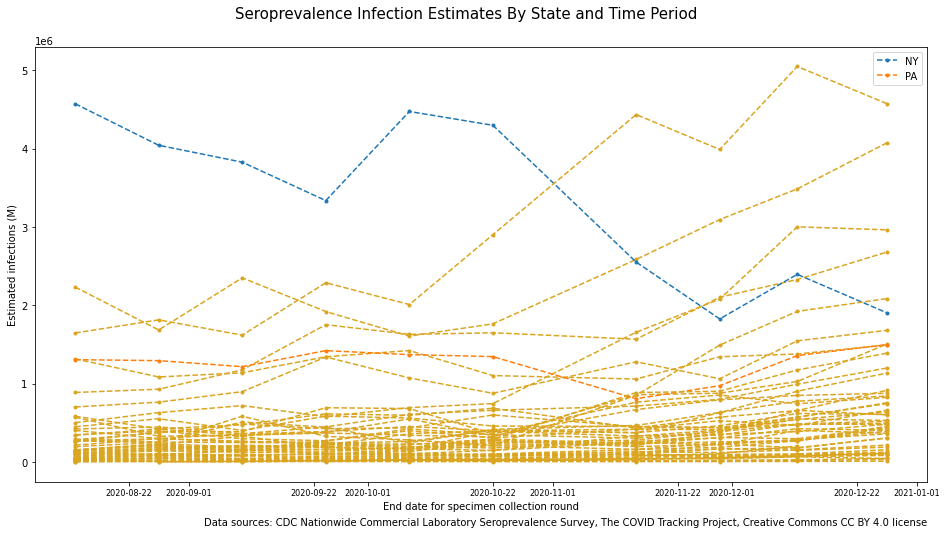

In [12]:
fig, ax = plt.subplots(figsize = (16, 8))
for state in master_df['state'].unique():
    if float(master_df[master_df['state']==state][['undercount_rate']].iloc[0]) > 10:
        ax.plot(
            master_df[master_df['state']==state][['date_range_top_max']], 
            master_df[master_df['state']==state][['Estimated cumulative infections count']], 
            label = state,
            ls = '--',
            marker = '.')    
    else:
        ax.plot(
            master_df[master_df['state']==state][['date_range_top_max']], 
            master_df[master_df['state']==state][['Estimated cumulative infections count']], 
            color = 'goldenrod',
            ls = '--',
            marker = '.')    
ax.tick_params(axis='x', which='major', labelsize=8)
ax.set_xlabel('End date for specimen collection round')
ax.set_ylabel('Estimated infections (M)')
ax.legend()
fig.suptitle(f'Seroprevalence Infection Estimates By State and Time Period', size=15, y=0.95)
plt.savefig(f'img/seroprev_infection_estimates_by_state_and_period.png')
plt.figtext(0.9, 0.05, 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right');

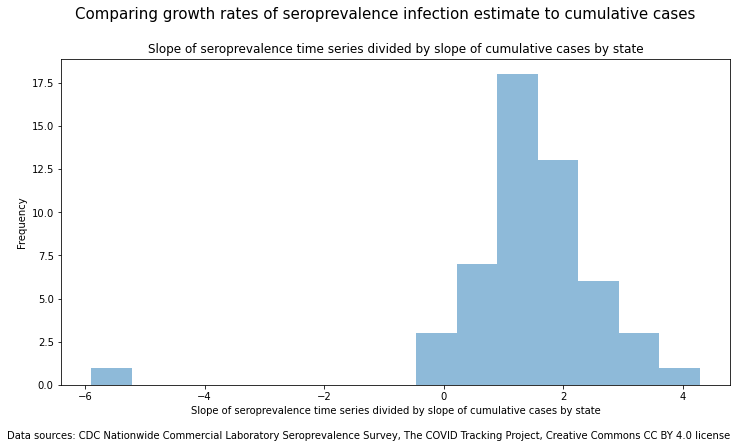

In [13]:
# For each state, let's  see how the growth in estimated infections from seroprevalence data
# compares to the growth in cumulative cases. If the metrics are valid and undercount rate is 
# relatively constant, then the slope of the estimated infection time series over the slope of the 
# cumulative cases time series should be consistent. 
    
states, infections_slopes, cases_slopes, slope_compare = [], [], [], []
for state in master_df['state'].unique():
    y = master_df[master_df['state']==state]['Estimated cumulative infections count']
    X = sm.add_constant(master_df[master_df['state']==state]['Round'])
    y.fillna(y.mean(), axis=0,inplace=True)
    infections_model = sm.OLS(y, X)
    infections_results = infections_model.fit()
    infections_slopes.append(infections_results.params['Round'])
    y2 = master_df[master_df['state']==state]['cumulative_cases']
    X2 = sm.add_constant(master_df[master_df['state']==state]['Round'])
    y2.fillna(y2.mean(), axis=0,inplace=True)
    cases_model = sm.OLS(y2, X2)
    cases_results = cases_model.fit()
    cases_slopes.append(cases_results.params['Round'])
    slope_compare.append(infections_results.params['Round'] / cases_results.params['Round'])
    states.append(state)
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(slope_compare, bins=15, alpha=0.5)
ax.set_xlabel('Slope of seroprevalence time series divided by slope of cumulative cases by state')
ax.set_ylabel('Frequency')
ax.set_title('Slope of seroprevalence time series divided by slope of cumulative cases by state')
fig.suptitle(f'Comparing growth rates of seroprevalence infection estimate to cumulative cases', size=15, y=1)
plt.figtext(0.9, 0.0, 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right')
plt.savefig(f'img/slope_comparisons.png');

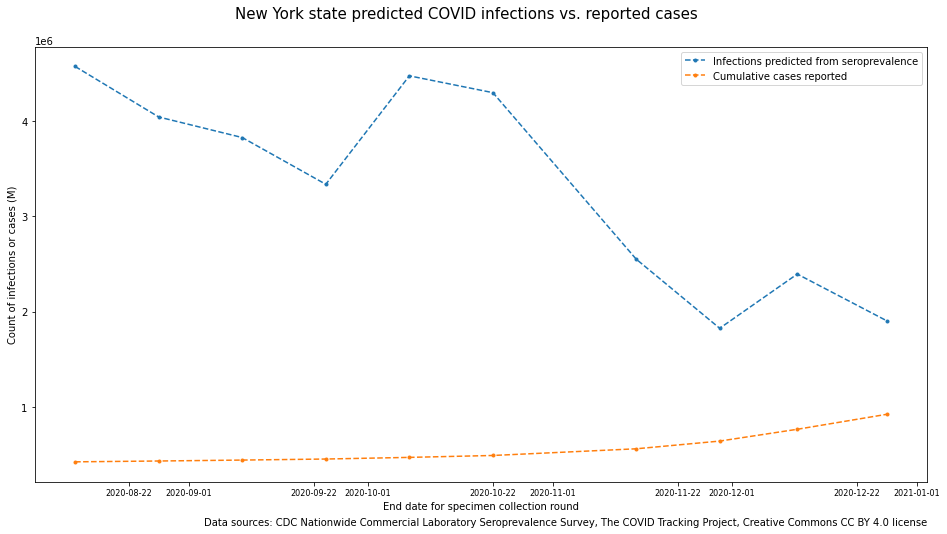

In [14]:
fig, ax = plt.subplots(figsize = (16, 8))
for state in ['NY']:
    ax.plot(
            master_df[master_df['state']==state][['date_range_top_max']], 
            master_df[master_df['state']==state][['Estimated cumulative infections count']], 
            label = 'Infections predicted from seroprevalence',
            ls = '--',
            marker = '.')    
    ax.plot(
            master_df[master_df['state']==state][['date_range_top_max']], 
            master_df[master_df['state']==state][['cumulative_cases']], 
            label = 'Cumulative cases reported',
            ls = '--',
            marker = '.')    
ax.tick_params(axis='x', which='major', labelsize=8)    
ax.set_xlabel('End date for specimen collection round')
ax.set_ylabel('Count of infections or cases (M)')
ax.legend()
fig.suptitle(f'New York state predicted COVID infections vs. reported cases', size=15, y=0.95)
plt.savefig(f'img/NY_infections_vs_cases.png')
plt.figtext(0.9, 0.05, 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right');

## Dropping New York and '0-17' age group
### Unfortunately, I don't know of any case dataset that has cases by day both age and state. We will need to 

In [15]:
#1 Figure out 
NY_case_share = master_df[master_df['state']=='NY'].groupby('Round').agg(
                            NY_share = ('cumulative_cases', 'sum')) / master_df.groupby('Round').agg(
                            NY_share = ('cumulative_cases', 'sum'))
NY_case_share

,NY_share
Round,
1,0.081338
2,0.074282
3,0.069671
4,0.065489
5,0.062381
6,0.058806
7,0.050685
8,0.047910
9,0.047614


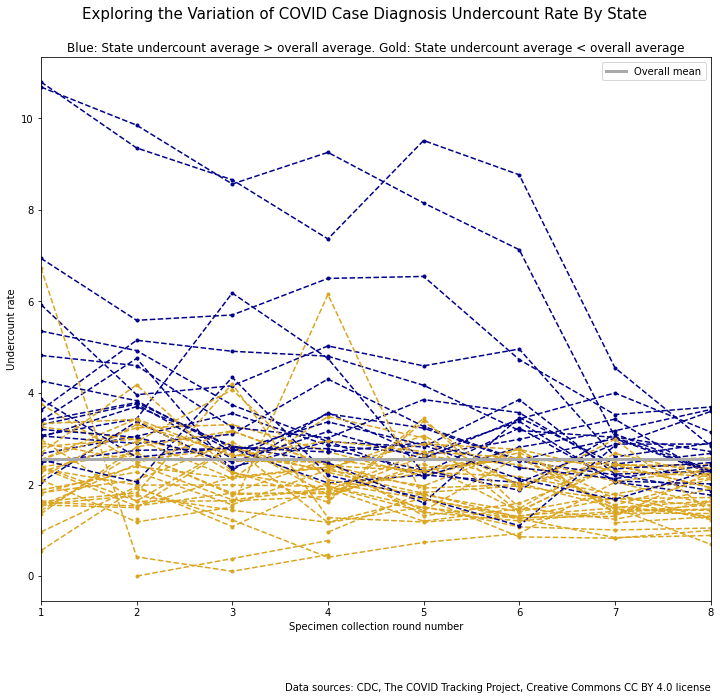

In [16]:
fig, ax = plt.subplots(figsize = (12, 10))
overall_undercount_rate = master_df['undercount_rate'].mean()

for state in master_df['state'].unique():
    if master_df[master_df['state']==state][['undercount_rate']].mean()[0] > overall_undercount_rate:
        line_color = 'darkblue'
    else:
        line_color = 'goldenrod'
    ax.plot(master_df[master_df['state']==state][['Round']], 
            master_df[master_df['state']==state][['undercount_rate']], 
            color = line_color,
            ls = '--',
            marker = '.')

ax.set_xlabel('Specimen collection round number')
ax.set_ylabel('Undercount rate')
ax.set_xlim(1,8)
ax.axhline(overall_undercount_rate, label = 'Overall mean', color = 'darkgrey', lw = 3)
ax.set_title('Blue: State undercount average > overall average. Gold: State undercount average < overall average')
ax.legend()
fig.suptitle(f'Exploring the Variation of COVID Case Diagnosis Undercount Rate By State', size=15, y=0.95)
plt.figtext(0.9, 0, 'Data sources: CDC, The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right');


In [32]:
# Let's plot the regression coefficients (slopes) for these lines.
## Actually, plot all trend lines to show how most trend downwards, as one would expect. Those with early breakouts
## have twice the slope of change from Round 1 to Round 6.
## Can we reduce the effect of undercounting early on due to lack of test capacity? That's up next.
    
slopes = []
# for state in (df_state[df_state['CVD_group']!=1]['state'].unique()):
for state in master_df['state'].unique():
    y = master_df[master_df['state']==state]['undercount_rate']
    X = sm.add_constant(master_df[master_df['state']==state]['Round'])
#     print(type(X))
    y.fillna(y.mean(), axis=0,inplace=True)
    model = sm.OLS(y, X)
    results = model.fit()
    slopes.append(results.params['Round'])
print(slopes, sum(slopes)/ len(slopes))

[0.10069620413874919, -0.13822066132997574, -0.06273190280569443, -0.016248769062666278, -0.12314725630993173, -0.15261636817155888, -0.1070074979919862, 0.11242847598566787, -0.22783962544706865, 0.0495727917086424, -0.07686560371078968, 0.0754439734169052, -0.29302225375162144, -0.11629192690894083, 0.08910960445565169, -0.08783782507639458, -0.04664603469218169, -0.09521924094402534, -0.2232303455270046, -0.1176865256852256, -0.26556742845604475, -0.14379932752486077, -0.10488574805790635, -0.2828858736130987, 0.033295373961825775, -0.04653673962466374, 0.03415816610725042, -0.06200947956390576, -0.11587748899133662, -0.262066452733783, -0.11469319725013316, -0.4472517281392946, 0.058381809308280214, -0.10087846400703451, -0.9720577141729998, 0.07643106073800689, -0.12838601365070648, -0.2802268562446461, -1.0435370997882178, -0.2701732100724772, -0.05118094228901462, -0.14559122225795906, 0.12933172088874345, -0.09492939527298866, 0.03284277526314938, -0.04858016847046754, -0.20505

Can we estimate a current undercount rate upper bound? Conceivably, this could be the undercount rate for states that didn't experience an early outbreak, and thus didn't have a large amount of undercounting due to lack of testing capacity in the early phase of the pandemic. There still was some undercounting due to that--we'll get to that later.

In [18]:
excludes_early_outbreak_states = master_df[master_df['state'].isin(df_state[df_state['CVD_group']!=1]['state'].unique())]

NameError: name 'df_state' is not defined

In [19]:
excludes_early_outbreak_states[excludes_early_outbreak_states['Round'].isin([7,8])].mean()['undercount_rate']

NameError: name 'excludes_early_outbreak_states' is not defined

## Recalibrate first few months.    

In [20]:
# Work with another version of the dataset. Load in the COVID Tracking Project dataset by date and by state for US
df_cases2 = pd.read_csv("https://api.covidtracking.com/v1/states/daily.csv")[
                                ['date', 'state', 'fips','positiveIncrease']]

df_cases2['date'] = pd.to_datetime(df_cases2['date'], format='%Y%m%d')
df_cases2['date']

# df_cases = df_cases[df_cases['date'] >= '2020-03-10']
df_cases2 = df_cases2.sort_values('date', ascending=True)

In [21]:
df_cases2[df_cases2['date'] < '2020-05-01']['positiveIncrease']

19820       0
19819       0
19818       0
19817       0
19816       0
         ... 
16500     100
16501    4681
16502     724
16503     145
16499     198
Name: positiveIncrease, Length: 3357, dtype: int64

In [22]:
def func(x, cutoff, states):
    if pd.to_datetime(x['date']) < pd.to_datetime(cutoff):
        if x['state'] in states:
#             return x['positiveIncrease'] * 6
            return x['positiveIncrease'] * 18 / x['date'].month
        else:
            return x['positiveIncrease'] * 11 / x['date'].month
    return x['positiveIncrease']

df_cases2['positiveIncrease'] = df_cases2.apply(
                                lambda row: func(row, '2020-07-15', 
                                df_state[df_state['CVD_group']==1]['state'].unique()), axis=1)

NameError: name 'df_state' is not defined

In [ ]:
df_cases2[df_cases2['date'] < '2020-05-01']['positiveIncrease']

In [ ]:
temp_case_df = []
for round in range(len(round_dates)):
    round_df = (df_cases2[df_cases2['date'] <= round_dates.iloc[round][0]].
                   groupby('state').
                   agg(cumulative_cases = ('positiveIncrease','sum'))
                    ).reset_index()
    round_df['round'] = round + 1
    temp_case_df.append(round_df)

case_df2 = pd.concat(temp_case_df, ignore_index=True)

In [ ]:
master_df2 = seroprev.merge(case_df2, left_on=['Site', 'Round'], right_on=['state', 'round'])

In [ ]:
master_df2['undercount_rate'] = master_df2['Estimated cumulative infections count'] / master_df2['cumulative_cases']
master_df2['undercount_rate'].hist();

In [ ]:
fig, ax = plt.subplots(figsize = (12, 10))

overall_undercount_rate = master_df2['undercount_rate'].mean()
# for state in ('MD', 'LA', 'CA'):
for state in master_df['state'].unique():
    if master_df2[master_df2['state']==state][['undercount_rate']].mean()[0] > overall_undercount_rate:
        line_color = 'darkblue'
    else:
        line_color = 'goldenrod'
    ax.plot(master_df2[master_df2['state']==state][['Round']], 
            master_df2[master_df2['state']==state][['undercount_rate']], 
            color = line_color,
            ls = '--',
            marker = '.')

ax.set_xlabel('Specimen collection round number')
ax.set_ylabel('Undercount rate')
ax.set_xlim(1,8)
ax.axhline(overall_undercount_rate, label = 'Overall mean', color = 'darkgrey', lw = 3)
ax.set_title('Blue: State undercount average > overall average. Gold: State undercount average < overall average')
ax.legend()
fig.suptitle(f'Exploring the Variation of COVID Case Diagnosis Undercount Rate By State', size=15, y=0.95)
plt.figtext(0.9, 0, 'Data sources: CDC, The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right');


In [23]:
# Let's plot the regression coefficients (slopes) for these lines.
    
slopes2 = []
for state in (df_state[df_state['CVD_group']==1]['state'].unique()):
# for state in master_df['state'].unique():
    y = master_df2[master_df2['state']==state]['undercount_rate']
    X = sm.add_constant(master_df2[master_df2['state']==state]['Round'])
    y.fillna(y.mean(), axis=0,inplace=True)
    model = sm.OLS(y, X)
    results = model.fit()
    slopes2.append(results.params['Round'])
#     print(y, results.predict(), results.params['Round'])
print(slopes2, sum(slopes2)/ len(slopes2))

NameError: name 'df_state' is not defined